In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


All the patients are neccessarily female at least 21 years old.

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing value analysis

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

Splitting the dataset into traning and testing set

In [12]:
#dividing the dataset into feature X and output Y
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
#using the inbuilt train_test_split from sklearn to split the data into 20% testing and 80% training set.
#an integer value in random_state parameter is passed to ensure the same splitting every time the code is run.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Normalizing the training and testing features

In [14]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [15]:
#training the logistic regression model
model=LogisticRegression(random_state=42)
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [16]:
#predicting the output of testing set
#getting the probability of being 1 of each testing set
y_pred=model.predict(X_test_scaled)
y_pred_proba=model.predict_proba(X_test_scaled)[:,1]

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7857142857142857

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [24]:
# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.7857142857142857
Precision: 0.7291666666666666
Recall: 0.6363636363636364
F1 Score: 0.6796116504854369
ROC-AUC Score: 0.8165289256198347


Text(0, 0.5, 'True Label')

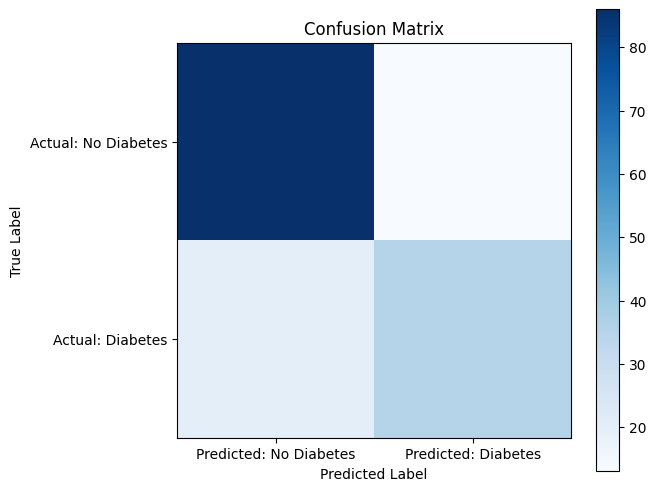

In [25]:
# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(14, 6))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted: No Diabetes', 'Predicted: Diabetes'])
plt.yticks([0, 1], ['Actual: No Diabetes', 'Actual: Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

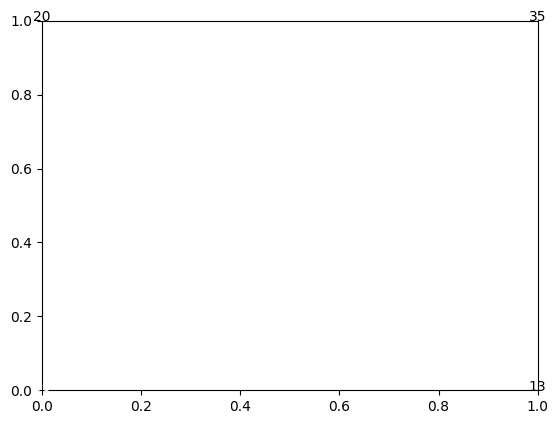

In [26]:
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

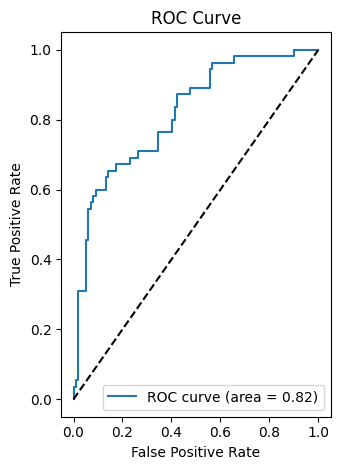

In [27]:
# ROC Curve Plot
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [28]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [29]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [30]:
# Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
y_pred_best_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [31]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)

In [32]:
# Print the best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC-AUC Score: {roc_auc_best}")

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.7792207792207793
Precision: 0.7142857142857143
Recall: 0.6363636363636364
F1 Score: 0.6730769230769231
ROC-AUC Score: 0.8165289256198347


In [33]:
# Feature importance (coefficients)
feature_importance = best_model.coef_[0]
feature_names = X.columns

In [34]:
# Display feature importance sorted by absolute value
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', key=abs, ascending=False)

In [35]:

print(feature_importance_df)

                    Feature  Importance
1                   Glucose    1.089381
5                       BMI    0.791731
7                       Age    0.425589
2             BloodPressure   -0.255904
6  DiabetesPedigreeFunction    0.233423
0               Pregnancies    0.213506
4                   Insulin   -0.209893
3             SkinThickness    0.048242
